In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import seaborn as sns

In [69]:
# Load data from separate training and testing files
titanic_df=pd.read_csv("/content/drive/MyDrive/Datasets/Titanic Data/Titanic-Dataset.csv")
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
features=titanic_df.columns
features

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [71]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Inferences**
Age, Cabin, Embarked has missing values . So, we should impute them.

In [72]:
# Impute missing values in 'Age' with the mean
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

# Impute missing values in 'Embarked' with the mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Impute missing values in 'Cabin' with a placeholder 'Unknown'
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')

# Verify that there are no more missing values
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [73]:
titanic_df['Pclass']=titanic_df['Pclass'].apply(str)


Create One Hot Encoding for Object datatype columns

In [74]:
for col in titanic_df.dtypes[titanic_df.dtypes=='object'].index:
  for_dummy=  titanic_df.pop(col)
  titanic_df=pd.concat([titanic_df, pd.get_dummies(for_dummy, prefix=col)], axis=1)
titanic_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,35.0,0,0,8.0500,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [75]:
# Convert boolean columns to integers
for col in titanic_df.columns:
    if titanic_df[col].dtype == 'bool':
        titanic_df[col] = titanic_df[col].astype(int)

display(titanic_df.head())

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [76]:
X=titanic_df.drop('Survived',axis=1)
y=titanic_df['Survived']

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
y_pred=rf.predict(X_test)

In [80]:
# Step 8: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8268156424581006

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [81]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

np.float64(0.8084942084942084)

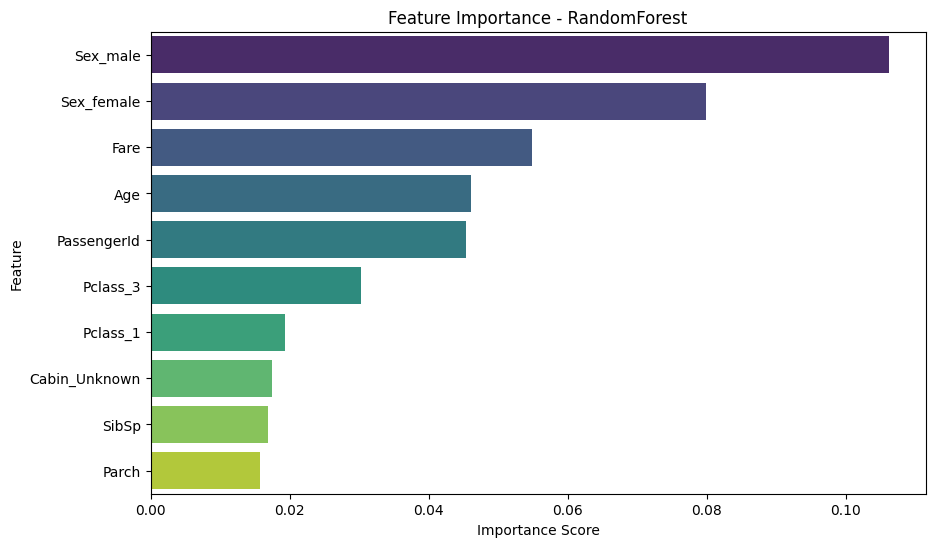

                            Feature  Importance
900                        Sex_male    0.106176
899                      Sex_female    0.079839
4                              Fare    0.054843
1                               Age    0.046045
0                       PassengerId    0.045431
...                             ...         ...
1291                  Ticket_349252    0.000000
174   Name_Cohen, Mr. Gurshon "Gus"    0.000000
1431                Ticket_A/5 3540    0.000000
1430                Ticket_A/5 3536    0.000000
998                    Ticket_19972    0.000000

[1733 rows x 2 columns]


In [82]:
importances = rf.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10), palette='viridis', hue='Feature', legend=False) # Displaying top 10 for readability
plt.title('Feature Importance - RandomForest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
print(feat_imp)